[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ianjure/valorant-match-prediction/blob/main/Valorant_Match_Prediction.ipynb)

**Author:** Ian Jure Macalisang

**Email:** ianjuremacalisang2@gmail.com

**Link:** https://github.com/ianjure/valorant-match-prediction

**NOTE**: UPLOAD **[VCT2023.csv](https://github.com/ianjure/valorant-match-prediction/blob/main/VCT2023.csv)** FIRST!

# **I. Dataset Overview**

**Dataset Features:**
* **match_id** - ID of VCT 2023 match
* **game_id** - ID of the match's game
* **team** - Name of the VCT team
* **score_team** - Score of the team after the game
* **opponent** - Team name of the opponent
* **score_opp** - Score of the opponent after the game
* **win_lose** - If the team or the opponent won the game
* **map** - Game's map played
* **map_pick** - Who picked the map
* **player_id** - ID of the VCT player
* **player** - Name of the team's player
* **agent** - Name of the player's agent
* **rating** - Rating score of the player
* **acs** - Average combat score of the player
* **kill** - Kill/s accumulated by the player
* **death** - Death/s accumulated by the player
* **assist** - Assist/s accumulated by the player
* **kast** - Kills, Assists, Survived, and Trade percentage of the player
* **adr** - The average amount of damage a player deals to opponents per round
* **hs** - Headshot percentage of the player
* **fk** - First kill/s accumulated by the player
* **fd** - First death/s accumulated by the player



# **II. Data Preprocessing**

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# SUPPRESS ALL WARNINGS
warnings.filterwarnings("ignore")

In [2]:
# SHOW ALL COLUMNS
pd.set_option('display.max_columns', None)

In [3]:
# READING THE DATA
data = pd.read_csv('VCT2023.csv')
data.head()

,match_id,game_id,team,score_team,opponent,score_opp,win_lose,map,map_pick,player_id,player,agent,rating,acs,kill,death,assist,kast,adr,hs,fk,fd
0,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,999,Laz,sova,1.19,239,15,11,6,0.72,146,0.16,1,0
1,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,1395,TENNN,killjoy,0.84,234,15,14,6,0.61,145,0.32,1,4
2,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,424,Dep,jett,0.68,173,10,15,2,0.67,123,0.18,4,2
3,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,1000,crow,kayo,0.63,142,8,15,4,0.83,92,0.29,3,2
4,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,6668,SugarZ3ro,omen,0.57,114,7,16,8,0.61,63,0.13,0,1


In [4]:
# CHECKING NULL VALUES AND DATA TYPES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   match_id    6160 non-null   int64  
 1   game_id     6160 non-null   int64  
 2   team        6160 non-null   object 
 3   score_team  6160 non-null   int64  
 4   opponent    6160 non-null   object 
 5   score_opp   6160 non-null   int64  
 6   win_lose    6160 non-null   object 
 7   map         6160 non-null   object 
 8   map_pick    6160 non-null   object 
 9   player_id   6160 non-null   int64  
 10  player      6160 non-null   object 
 11  agent       6160 non-null   object 
 12  rating      6160 non-null   float64
 13  acs         6160 non-null   int64  
 14  kill        6160 non-null   int64  
 15  death       6160 non-null   int64  
 16  assist      6160 non-null   int64  
 17  kast        6160 non-null   float64
 18  adr         6160 non-null   int64  
 19  hs          6160 non-null  

In [5]:
# CHECKING BASIC STATISTICS
data.describe()

,match_id,game_id,score_team,score_opp,player_id,rating,acs,kill,death,assist,kast,adr,hs,fk,fd
count,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000
mean,56207.715909,125602.123377,10.679383,10.679383,4859.982143,1.008177,197.908929,14.789286,14.795942,6.589286,0.720745,129.616883,0.258455,2.135552,2.135552
std,3219.046576,7720.262802,3.445156,3.445156,5713.799933,0.289092,56.627896,5.309277,3.664544,4.037470,0.115132,36.228344,0.090703,1.819498,1.689092
min,52768.000000,117161.000000,0.000000,0.000000,4.000000,0.030000,36.000000,2.000000,2.000000,0.000000,0.130000,20.000000,0.000000,0.000000,0.000000
25%,53561.750000,119245.750000,8.000000,8.000000,733.000000,0.810000,158.000000,11.000000,13.000000,4.000000,0.650000,104.000000,0.190000,1.000000,1.000000
50%,53699.000000,119635.500000,13.000000,13.000000,2811.000000,0.990000,194.000000,14.000000,15.000000,6.000000,0.730000,127.000000,0.250000,2.000000,2.000000
75%,59969.250000,134549.500000,13.000000,13.000000,7729.500000,1.200000,233.000000,18.000000,17.000000,9.000000,0.800000,153.000000,0.310000,3.000000,3.000000
max,61198.000000,137663.000000,21.000000,21.000000,39163.000000,2.290000,441.000000,42.000000,33.000000,33.000000,1.000000,291.000000,0.710000,12.000000,11.000000


This will be our process to clean and improve our data:
1.   Drop Irrelevant Columns
2.   One Hot Encode Map and Agent Columns
3.   Label Encode Categorical Columns
4.   Calculating Average Scores of Team per Game
  *   Combining Every 5 Rows
  *   Getting Their Mean
5.   Fix Values for Agent Columns
6.   Shuffle the Data

**Shuffling data** is a simple yet powerful technique to ensure that our machine learning models train and evaluate effectively. By randomly rearranging the data points, we can avoid biases, improve generalization, and make our models more robust.



In [6]:
import math
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing as pre

def preprocess(data):

    # DROP COLUMNS
    data.drop(['match_id', 'game_id', 'team', 'score_team', 'opponent', 'score_opp', 'map_pick', 'player_id', 'player'], axis=1, inplace=True)

    # ONE HOT ENCODING
    data = pd.get_dummies(data, columns=['map', 'agent'])

    # LABEL ENCODING
    le = LabelEncoder()

    map_list = [x for x in data.columns if 'map' in x]
    agent_list = [x for x in data.columns if 'agent' in x]

    for map in map_list:
        data[map] = le.fit_transform(data[map])
    for agent in agent_list:
        data[agent] = le.fit_transform(data[agent])

    data['win_lose'] = data['win_lose'] == 'team win'
    data['win_lose'] = data['win_lose'].astype(int)

    # CALCULATE AVERAGE SCORES
    data_ave = data.groupby(np.arange(len(data))//5).mean()

    # FIX COLUMN VALUES
    for agent in agent_list:
        data_ave[agent] = data_ave[agent].apply(lambda x: math.ceil(x))

    data_ave['win_lose'] = data_ave['win_lose'].astype(int)

    for map in map_list:
        data_ave[map] = data_ave[map].astype(int)

    # SHUFFLE THE DATA
    shuffled_df = data_ave.sample(n=len(data_ave), replace=False)
    shuffled_df = shuffled_df.reset_index(drop=True)

    final_df = shuffled_df.copy()

    return final_df

In [7]:
# PREPROCESS THE DATASET
data_clean = preprocess(data)
data_clean.head()

,win_lose,rating,acs,kill,death,assist,kast,adr,hs,fk,fd,map_Ascent,map_Bind,map_Fracture,map_Haven,map_Icebox,map_Lotus,map_Pearl,map_Split,agent_astra,agent_breach,agent_brimstone,agent_chamber,agent_cypher,agent_fade,agent_gekko,agent_harbor,agent_jett,agent_kayo,agent_killjoy,agent_neon,agent_omen,agent_phoenix,agent_raze,agent_reyna,agent_sage,agent_skye,agent_sova,agent_viper,agent_yoru
0,0,0.906,205.0,17.2,17.8,7.6,0.692,138.0,0.302,2.0,2.8,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,1.096,199.4,14.6,12.8,5.0,0.770,132.2,0.232,2.2,1.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0
2,0,0.892,196.0,15.8,17.2,5.4,0.766,129.2,0.276,2.6,2.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
3,0,0.732,162.2,10.2,16.0,4.4,0.588,110.2,0.232,1.4,2.4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
4,0,0.802,163.6,13.0,15.4,3.4,0.566,104.6,0.388,1.4,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0


# **III. Exploratory Data Analysis**

### **Is the Dataset Balanced?**

In [8]:
win = data_clean['win_lose'] == 1
lose = data_clean['win_lose'] == 0
percentage = len(win)/float(len(lose))

print(f'Win/Lose Percentage: {percentage * 100 :.3f}%')
print(f'Win: {len(win)}')
print(f'Lose: {len(lose)}')

Win/Lose Percentage: 100.000%
Win: 1232
Lose: 1232


With win and lose count of 1232, the dataset is perfectly balanced.

### **What are the Win Rates of Each Agents?**

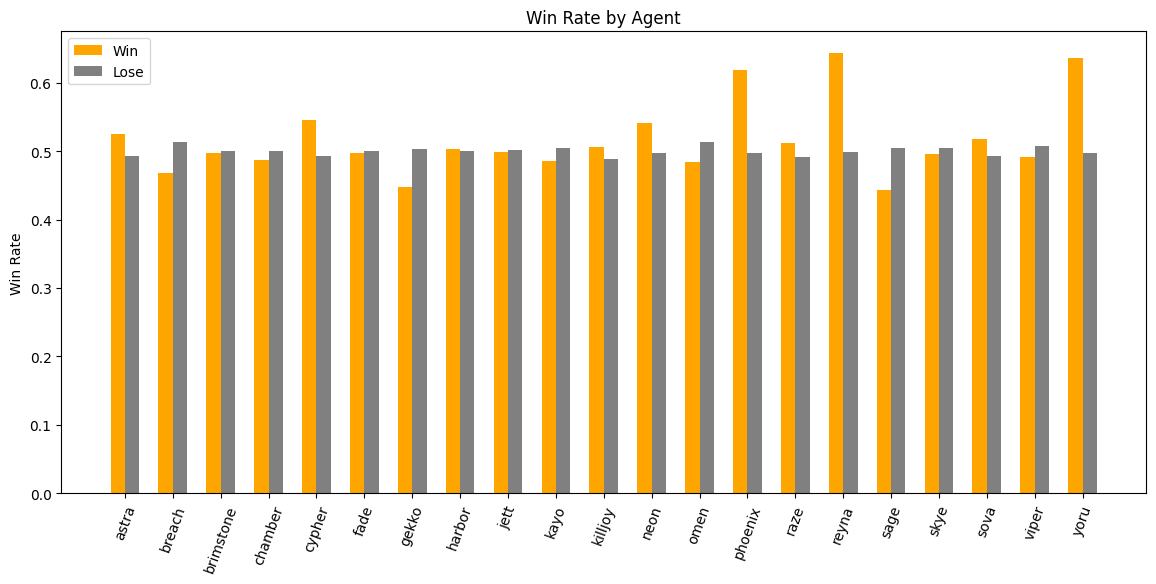

In [9]:
agent_list = [x.split("_")[1] for x in data_clean.columns if 'agent' in x]
agent_win = [data_clean.groupby(f"agent_{x}")['win_lose'].mean()[1] for x in agent_list]
agent_lose = [data_clean.groupby(f"agent_{x}")['win_lose'].mean()[0] for x in agent_list]

count = np.arange(len(agent_list))
width = 0.3

plt.figure(figsize=(14,6))

plt.bar(count, agent_win, color='orange', width=width, label='Win')
plt.bar(count + width, agent_lose, color='grey', width=width, label='Lose')

plt.ylabel("Win Rate")
plt.title("Win Rate by Agent")

plt.xticks(count + width / 2, agent_list, rotation=70)
plt.legend()

plt.show()

We can observe that *Reyna*, *Phoenix*, and *Yoru* achieved the highest win rates among other agents.

### **How Many Times Each of the Agents are Picked?**

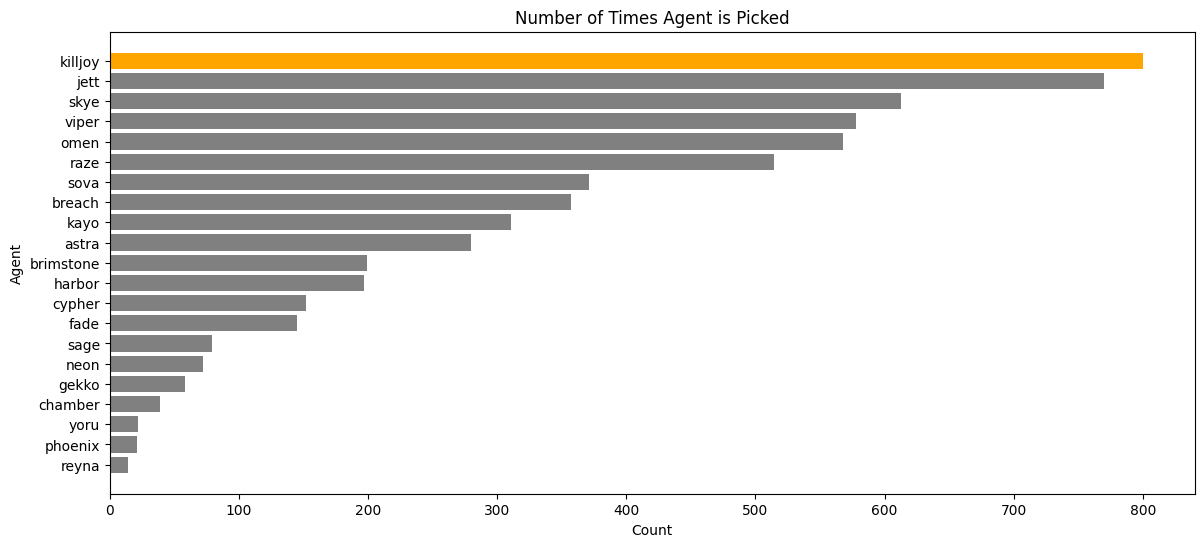

In [10]:
agent_list = [x.split("_")[1] for x in data_clean.columns if 'agent' in x]
agent_picked = [data_clean[f"agent_{x}"].value_counts()[1] for x in agent_list]

agent_picked_sorted = pd.DataFrame({'Agent': agent_list, 'Count': agent_picked}).sort_values('Count')
color = ['grey' for x in range(len(agent_list))]
color[-1] = 'orange'

plt.figure(figsize=(14,6))
plt.barh(agent_picked_sorted['Agent'], agent_picked_sorted['Count'], color=color)

plt.ylabel("Agent")
plt.xlabel("Count")

plt.title("Number of Times Agent is Picked")
plt.show()

Among other agents, Killjoy is shown to be the most picked agent, followed by Jett and Skye.

# **IV. Training the Models**

**Our training process will be:**

* Defining the Features and Target Variable
* Splitting the Data into Training and Testing Set
* Training the Classification Models
* Calculating Model Accuracy
* Choosing the Best Model


**Classification models we will use:**

* Logistic Regression
* Support Vector Machine
* K-Nearest Neighbors
* Random Forest Classifier
* Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import train_test_split

# DEFINE THE FEATURES (X) AND THE TARGET VARIABLE (y)
X = data_clean.drop(['win_lose'], axis=1)
y = data_clean['win_lose']

# SPLITTING THE DATA INTO TRAIN AND TEST SETS (80% TRAIN - 20% TEST)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# IMPORTING TOOLS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# INITIALIZE CLASSIFIERS
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'SVM': SVC(random_state=0),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0)
}

# DICTIONARY TO STORE RESULTS
results = {'Classifier': [],
          'Test Accuracy': [],
          'Total Errors': [],
          'Precision': [],
          'Recall': [],
          'F1 Score': [],
          'MCC': [],
          'Confusion Matrix': []}

# ITERATE OVER CLASSIFIERS
for clf_name, clf in classifiers.items():

    # FIT THE MODEL
    clf.fit(X_train, y_train)

    # PREDICT ON TEST SET
    y_pred = clf.predict(X_test)

    # CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
    accuracy = accuracy_score(y_test, y_pred)
    errors = (y_pred != y_test).sum()
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # STORE RESULTS
    results['Classifier'].append(clf_name)
    results['Test Accuracy'].append(accuracy)
    results['Total Errors'].append(errors)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)
    results['MCC'].append(mcc)
    results['Confusion Matrix'].append(cm)

# CREATE DATAFRAME FROM RESULTS
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# DISPLAY THE RESULTS
results_df[['Classifier','Test Accuracy','Total Errors','Precision','Recall','F1 Score','MCC']]

,Classifier,Test Accuracy,Total Errors,Precision,Recall,F1 Score,MCC
0,Gradient Boosting,0.943320,14,0.906977,0.983193,0.943548,0.889735
1,Logistic Regression,0.919028,20,0.902439,0.932773,0.917355,0.838473
2,Random Forest,0.914980,21,0.882812,0.949580,0.914980,0.832392
3,KNN,0.858300,35,0.823077,0.899160,0.859438,0.719992
4,SVM,0.821862,44,0.781955,0.873950,0.825397,0.648880


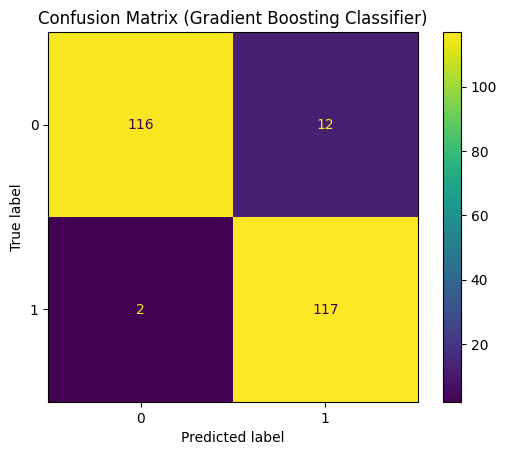

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=results_df['Confusion Matrix'][0], display_labels = [0, 1])

cm_display.plot()
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.show()

The confusion matrix showed that our best model (Gradient Boosting Classifer) predicted more **false positive** (top right) than **false negative** (bottom left).

# **V. Tuning the Best Model**

By using **Grid Search Cross-Validation** we can find the optimal combination of hyperparameters for a given model.

We will also use **Decision Tree Classifier** as a base model for the tuning step since it is more efficient to use than ensemble methods.

In [ ]:
# DICTIONARY TO STORE TUNING RESULTS
tuning_results = {'Classifier': [],
                  'Best Accuracy': [],
                  'Test Accuracy': [],
                  'Total Errors': [],
                  'Precision': [],
                  'Recall': [],
                  'F1 Score': [],
                  'MCC': []}

In [ ]:
# IMPORTING TOOLS AND METHODS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
"""
DECISION TREE CLASSIFIER
"""

# DEFINE THE PARAMETER GRID
param_grid_dt = {
  'criterion': ['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_depth': range(8, 13),
  'min_samples_split': range(6, 11),
  'min_samples_leaf': range(1, 4),
  'max_features': ['sqrt', 'log2', None],
  'random_state': [0],
  'max_leaf_nodes': range(80, 101, 2),
  'class_weight': [{0: 1, 1: w} for w in np.linspace(1.3, 1.7, 5)],
  'ccp_alpha': np.linspace(4e-05, 6e-05, 5)
}

# INITIALIZE DECISION TREE CLASSIFIER
dt_classifier = DecisionTreeClassifier()

# INSTANTIATE GRIDSEARCHCV
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_dt.fit(X_train, y_train)

# DISPLAY THE BEST PARAMETERS
print("\nBest Parameters found:")
print(grid_search_dt.best_params_)

# PREDICT
dt_ypred = grid_search_dt.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
dt_accuracy = accuracy_score(y_test, dt_ypred)
dt_errors = (dt_ypred != y_test).sum()
dt_prec = precision_score(y_test, dt_ypred)
dt_rec = recall_score(y_test, dt_ypred)
dt_f1 = f1_score(y_test, dt_ypred)
dt_mcc = matthews_corrcoef(y_test, dt_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Decision Tree Classifier')
tuning_results['Best Accuracy'].append(grid_search_dt.best_score_)
tuning_results['Test Accuracy'].append(dt_accuracy)
tuning_results['Total Errors'].append(dt_errors)
tuning_results['Precision'].append(dt_prec)
tuning_results['Recall'].append(dt_rec)
tuning_results['F1 Score'].append(dt_f1)
tuning_results['MCC'].append(dt_mcc)

Fitting 5 folds for each of 247500 candidates, totalling 1237500 fits

Best Parameters found:
{'ccp_alpha': 4e-05, 'class_weight': {0: 1, 1: 1.5}, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': 80, 'min_samples_leaf': 3, 'min_samples_split': 7, 'random_state': 0, 'splitter': 'best'}


In [ ]:
# CREATE A DICTIONARY OF THE BASE MODEL'S BEST PARAMETERS FOUND
base_params = {
  'criterion': 'gini',
  'splitter': 'best',
  'max_depth': 8,
  'min_samples_split': 7,
  'min_samples_leaf': 3,
  'max_features': None,
  'random_state': 0,
  'max_leaf_nodes': 80,
  'class_weight': {0: 1, 1: 1.5},
  'ccp_alpha': 4e-05
}

We will now tune our best model in combination of the base parameters that we found.

In [ ]:
"""
GRADIENT BOOSTING CLASSIFIER
"""

# DEFINE THE PARAMETER GRID
param_grid_gb = {
  'n_estimators': range(60, 361, 50),
  'max_features': ['sqrt', 'log2', None],
  'learning_rate': np.linspace(0.01, 0.1, 5),
  'criterion': ['friedman_mse', 'squared_error']
}

# CREATE GRADIENT BOOSTING CLASSIFIER WITH THE BASE PARAMETERS
gb_model = GradientBoostingClassifier(
  max_depth=base_params['max_depth'],
  min_samples_split=base_params['min_samples_split'],
  min_samples_leaf=base_params['min_samples_leaf'],
  max_leaf_nodes=base_params['max_leaf_nodes'],
  ccp_alpha=base_params['ccp_alpha'],
  random_state=0
)

# INSTANTIATE GRIDSEARCHCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_gb.fit(X_train, y_train)

# PREDICT
gb_ypred = grid_search_gb.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
gb_accuracy = accuracy_score(y_test, gb_ypred)
gb_errors = (gb_ypred != y_test).sum()
gb_prec = precision_score(y_test, gb_ypred)
gb_rec = recall_score(y_test, gb_ypred)
gb_f1 = f1_score(y_test, gb_ypred)
gb_mcc = matthews_corrcoef(y_test, gb_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Gradient Boosting Classifier')
tuning_results['Best Accuracy'].append(grid_search_gb.best_score_)
tuning_results['Test Accuracy'].append(gb_accuracy)
tuning_results['Total Errors'].append(gb_errors)
tuning_results['Precision'].append(gb_prec)
tuning_results['Recall'].append(gb_rec)
tuning_results['F1 Score'].append(gb_f1)
tuning_results['MCC'].append(gb_mcc)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [ ]:
# DISPLAY THE BEST PARAMETERS FOR EACH METHOD
print("Gradient Boosting Classifier Best Parameters found:")
print(grid_search_gb.best_params_)

# CREATE DATAFRAME FROM TUNING RESULTS
tuning_results_df = pd.DataFrame(tuning_results).sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# DISPLAY THE TUNING RESULTS
tuning_results_df

Gradient Boosting Classifier Best Parameters found:
{'criterion': 'friedman_mse', 'learning_rate': 0.0325, 'max_features': None, 'n_estimators': 110}


,Classifier,Best Accuracy,Test Accuracy,Total Errors,Precision,Recall,F1 Score,MCC
0,Gradient Boosting Classifier,0.929949,0.927126,18,0.891473,0.966387,0.927419,0.857293


Upon tuning the best model, we can see that the accuracy declined. So we will use the **default parameters** in the final training instead of the results we found in the tuning process.

# **VI. Final Training**

We will now train the model using the whole dataset before saving it.

In [ ]:
# IMPORTING THE DATASET
whole_data = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/VCT 2023.csv')
data_processed = preprocess(whole_data)

# DEFINE THE FEATURES (X) AND THE TARGET VARIABLE (y)
X = data_processed.drop('win_lose', axis=1)
y = data_processed['win_lose']

# FIT THE MODEL
final_model = GradientBoostingClassifier(random_state=0)
final_model.fit(X, y)

GradientBoostingClassifier(random_state=0)

# **VII. Saving the Model**

In [ ]:
# IMPORTING THE LIBRARY
import pickle

In [ ]:
# SAVE MODEL
with open('model.pkl','wb') as f:
    pickle.dump(final_model, f)

# **VIII. Loading and Testing the Model**

In [ ]:
# LOAD MODEL
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
rating = 1.056 # @param {type:"number"}
acs = 211.4 # @param {type:"number"}
kill = 20.2 # @param {type:"number"}
death = 19 # @param {type:"number"}
assist = 6.6 # @param {type:"number"}
kast = 0.720 # @param {type:"number"}
adr = 138.6 # @param {type:"number"}
hs = 0.228 # @param {type:"number"}
fk = 3.0 # @param {type:"number"}
fd = 2.6 # @param {type:"number"}
map = 'Pearl' # @param ["Ascent", "Bind", "Fracture", "Haven", "Icebox", "Lotus", "Pearl", "Split"]
agent_1 = 'Astra' # @param ["Astra", "Breach", "Brimstone", "Chamber", "Cypher", "Fade", "Gekko", "Harbor", "Jett", "Kayo", "Killjoy", "Neon", "Omen", "Phoenix", "Raze", "Reyna", "Sage", "Skye", "Sova", "Viper", "Yoru"]
agent_2 = 'Jett' # @param ["Astra", "Breach", "Brimstone", "Chamber", "Cypher", "Fade", "Gekko", "Harbor", "Jett", "Kayo", "Killjoy", "Neon", "Omen", "Phoenix", "Raze", "Reyna", "Sage", "Skye", "Sova", "Viper", "Yoru"]
agent_3 = 'Killjoy' # @param ["Astra", "Breach", "Brimstone", "Chamber", "Cypher", "Fade", "Gekko", "Harbor", "Jett", "Kayo", "Killjoy", "Neon", "Omen", "Phoenix", "Raze", "Reyna", "Sage", "Skye", "Sova", "Viper", "Yoru"]
agent_4 = 'Phoenix' # @param ["Astra", "Breach", "Brimstone", "Chamber", "Cypher", "Fade", "Gekko", "Harbor", "Jett", "Kayo", "Killjoy", "Neon", "Omen", "Phoenix", "Raze", "Reyna", "Sage", "Skye", "Sova", "Viper", "Yoru"]
agent_5 = 'Skye' # @param ["Astra", "Breach", "Brimstone", "Chamber", "Cypher", "Fade", "Gekko", "Harbor", "Jett", "Kayo", "Killjoy", "Neon", "Omen", "Phoenix", "Raze", "Reyna", "Sage", "Skye", "Sova", "Viper", "Yoru"]

In [ ]:
input = {
    'rating': [rating],
    'acs': [acs],
    'kill': [kill],
    'death': [death],
    'assist': [assist],
    'kast': [kast],
    'adr': [adr],
    'hs': [hs],
    'fk': [fk],
    'fd': [fd],
    'map': [map],
    'agent': [agent_1 + agent_2 + agent_3 + agent_4 + agent_5]
}

In [ ]:
def preprocess_input(input):

    # CREATE MAP CATEGORIES COLUMNS
    input['map_Ascent'] = (input['map'] == 'Ascent').astype(int)
    input['map_Bind'] = (input['map'] == 'Bind').astype(int)
    input['map_Fracture'] = (input['map'] == 'Fracture').astype(int)
    input['map_Haven'] = (input['map'] == 'Haven').astype(int)
    input['map_Icebox'] = (input['map'] == 'Icebox').astype(int)
    input['map_Lotus'] = (input['map'] == 'Lotus').astype(int)
    input['map_Pearl'] = (input['map'] == 'Pearl').astype(int)
    input['map_Split'] = (input['map'] == 'Split').astype(int)

    # CREATE AGENT CATEGORIES COLUMNS
    input['agent_astra'] = np.array(('Astra' in input['agent'][0])).astype(int)
    input['agent_breach'] = np.array(('Breach' in input['agent'][0])).astype(int)
    input['agent_brimstone'] = np.array(('Brimstone' in input['agent'][0])).astype(int)
    input['agent_chamber'] = np.array(('Chamber' in input['agent'][0])).astype(int)
    input['agent_cypher'] = np.array(('Cypher' in input['agent'][0])).astype(int)
    input['agent_fade'] = np.array(('Fade' in input['agent'][0])).astype(int)
    input['agent_gekko'] = np.array(('Gekko' in input['agent'][0])).astype(int)
    input['agent_harbor'] = np.array(('Harbor' in input['agent'][0])).astype(int)
    input['agent_jett'] = np.array(('Jett' in input['agent'][0])).astype(int)
    input['agent_kayo'] = np.array(('Kayo' in input['agent'][0])).astype(int)
    input['agent_killjoy'] = np.array(('Killjoy' in input['agent'][0])).astype(int)
    input['agent_neon'] = np.array(('Neon' in input['agent'][0])).astype(int)
    input['agent_omen'] = np.array(('Omen' in input['agent'][0])).astype(int)
    input['agent_phoenix'] = np.array(('Phoenix' in input['agent'][0])).astype(int)
    input['agent_raze'] = np.array(('Raze' in input['agent'][0])).astype(int)
    input['agent_reyna'] = np.array(('Reyna' in input['agent'][0])).astype(int)
    input['agent_sage'] = np.array(('Sage' in input['agent'][0])).astype(int)
    input['agent_skye'] = np.array(('Skye' in input['agent'][0])).astype(int)
    input['agent_sova'] = np.array(('Sova' in input['agent'][0])).astype(int)
    input['agent_viper'] = np.array(('Viper' in input['agent'][0])).astype(int)
    input['agent_yoru'] = np.array(('Yoru' in input['agent'][0])).astype(int)

    input.drop(['map', 'agent'], axis=1, inplace=True)

    final_df = input.copy()

    return final_df

In [ ]:
input_df = pd.DataFrame(input)
input_final = preprocess_input(input_df)

ypred = model.predict(input_final)

if ypred[0] == 0:
  print("You will lose!")
else:
  print("You will win!")

You will win!


# **IX. Conclusion**

After thorough evaluation, we found that the **Gradient Boosting Classifier** performed the best. It achieved an accuracy rate of 94.3%, with precision at 90.69%, recall at 98.31%, an F1-score of 94.35%, and a Matthews correlation coefficient (MCC) of 88.97%.